## Student Id- 23242949
## Name: Jitendra Upadhyay

### Task 1: Data Preparation Pipeline

### A. Import Python Modules and Dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer 
#needed for data preparation
from sklearn.impute import SimpleImputer #For simpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer # for transformation
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder# used it for converting month and day to numerical

#### Load the dataset

In [2]:
df = pd.read_csv('./bank.csv')
print('(number of examples, number of attributes): ', df.shape)

(number of examples, number of attributes):  (2000, 17)


### B. Exploratory Data Analysis and Data Preparation

In [3]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [4]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [5]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [24]:
type(df.month)

pandas.core.series.Series

The dataset consists of 2000 data rows and 7 numerical columns. THere are missing values which we have looked in previous etivity.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

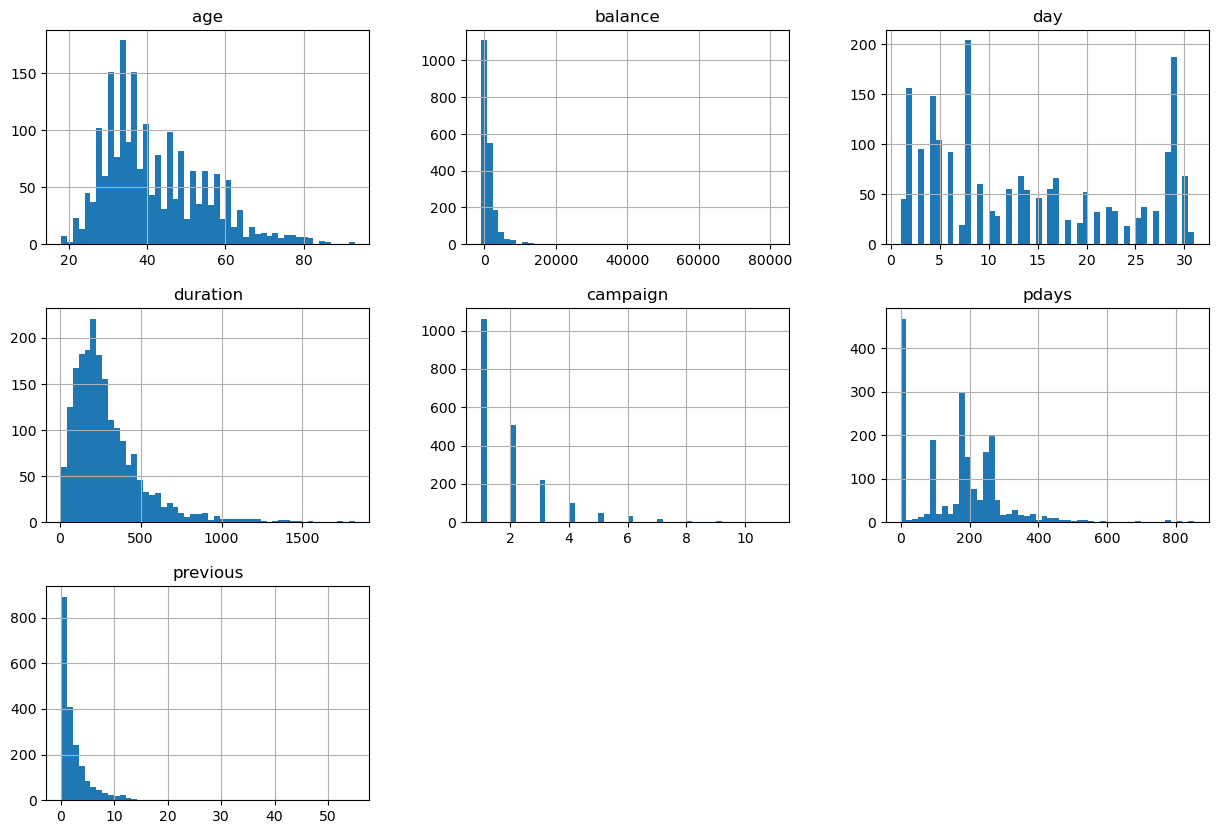

In [6]:
# Plot histograms for all numerical attributes
df.hist(bins=50, figsize=(15, 10))

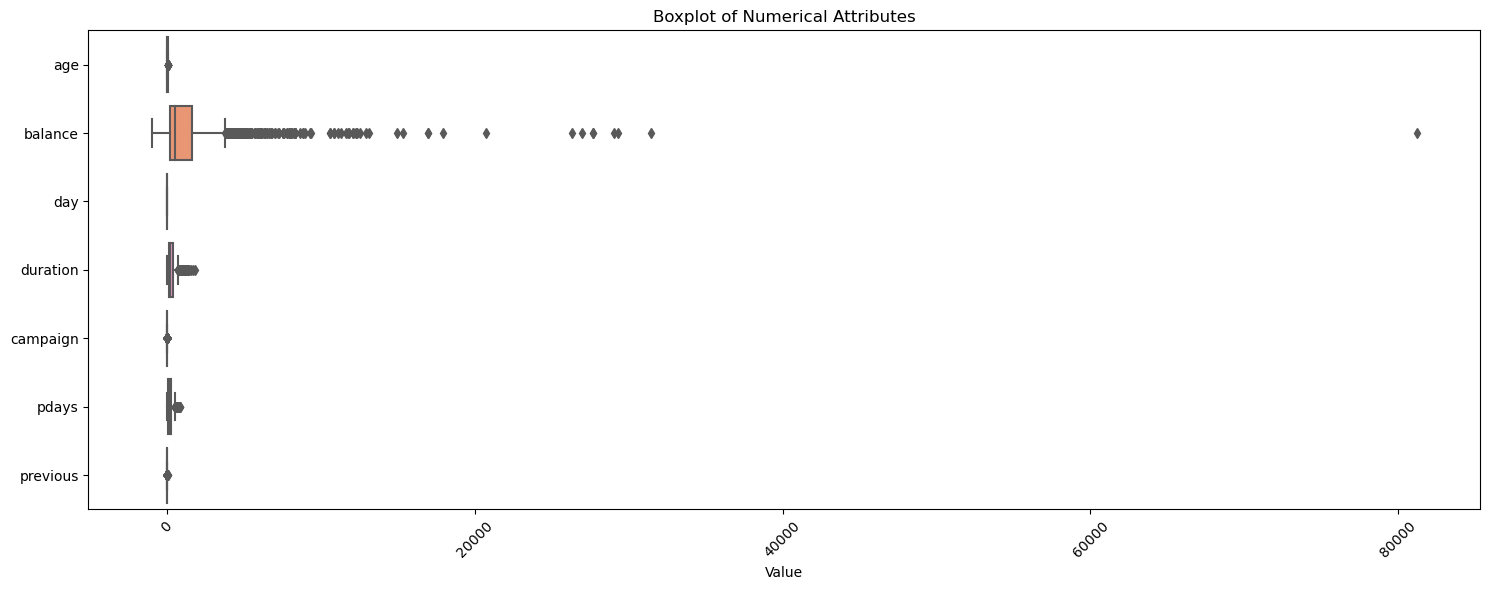

In [7]:
import seaborn as sns
# Set up the figure and axes
plt.figure(figsize=(15, 6))

# Create a boxplot for all numerical attributes
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Boxplot of Numerical Attributes')
plt.xlabel('Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

We will show the boxplots seperately as they don't look readable in one plot

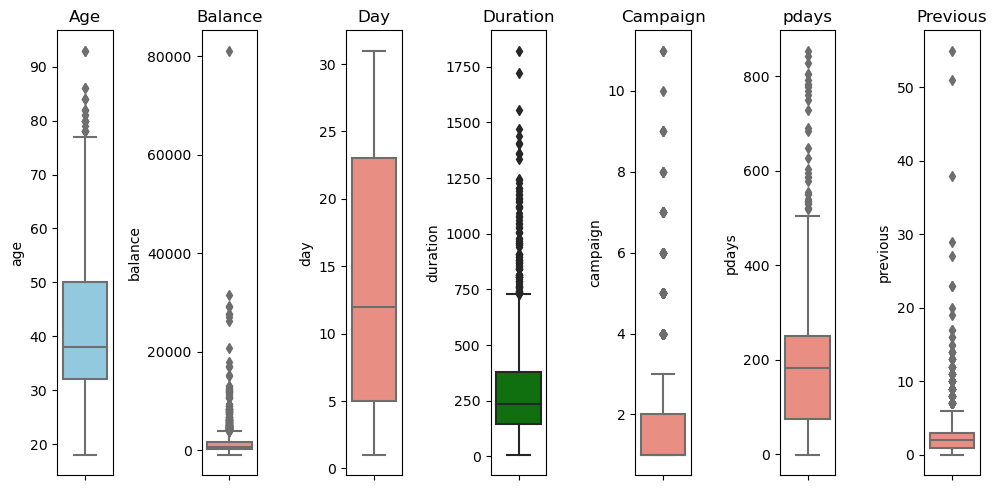

In [8]:
# Box plots for numerical attributes
plt.figure(figsize=(10, 5))

# Box plot for 'age'
plt.subplot(1, 7, 1)
sns.boxplot(y='age', data=df, color='skyblue')
plt.title('Age')

# Box plot for 'balance'
plt.subplot(1, 7, 2)
sns.boxplot(y='balance', data=df, color='salmon')
plt.title('Balance')

# Box plot for 'day'
plt.subplot(1, 7, 3)
sns.boxplot(y='day', data=df, color='salmon')
plt.title('Day')

# Box plot for 'duration'
plt.subplot(1, 7, 4)
sns.boxplot(y='duration', data=df, color='green')
plt.title('Duration')

# Box plot for 'campaign'
plt.subplot(1, 7, 5)
sns.boxplot(y='campaign', data=df, color='salmon')
plt.title('Campaign')

# Box plot for 'pdays'
plt.subplot(1, 7, 6)
sns.boxplot(y='pdays', data=df, color='salmon')
plt.title('pdays')

# Box plot for 'previous'
plt.subplot(1, 7, 7)
sns.boxplot(y='previous', data=df, color='salmon')
plt.title('Previous')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


#### Looking at the missing values

Columns with missing values:
age           12
job           10
education    104
contact      191
poutcome     454
dtype: int64


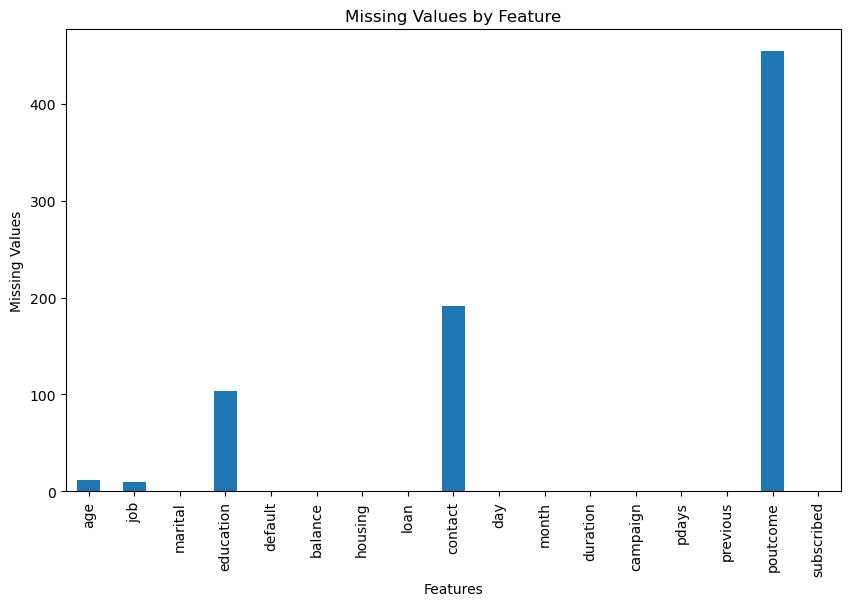

In [9]:
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])


# Plot missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Missing Values')
plt.show()

In [29]:
# Define columns with missing values and categorical columns
numeric_columns_with_missing_values = ['age']
categorical_columns_with_missing_values = ['education', 'contact', 'poutcome']

#columns_with_missing_values = ['age', 'job','education','contact','poutcome']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']
cyclical_columns = ['month', 'day']
# Convert 'month' and 'day' to numerical values using label encoding, will throw an error otherwise as it is series type
label_encoder = LabelEncoder()
df['month'] = label_encoder.fit_transform(df['month'])
df['day'] = label_encoder.fit_transform(df['day'])

In [30]:
#Define the pipeline steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

cyclical_transformer = Pipeline(steps=[
     ('month_cyclical', FunctionTransformer(lambda x: np.column_stack((np.sin(2 * np.pi * x / 12), np.cos(2 * np.pi * x / 12))))),
    # Assuming 12 months
    ('day_cyclical', FunctionTransformer(lambda x: np.column_stack((np.sin(2 * np.pi * x / 31), np.cos(2 * np.pi * x / 31)))))
    # Assuming 31 days in a month.I know this is wrong for some places like for 30 days month or feb but ignoring that

])



# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns_with_missing_values),
        ('cat', categorical_transformer, categorical_columns),
        ('cyc', cyclical_transformer, cyclical_columns)
    ])

In [33]:
# Display the pipeline
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month', 'day',
                                  'poutcome']),
                                ('cyc',
                                 Pipeline(steps=[('month_cyclical',
                                

In [32]:
# Apply transformations
transformed_data = preprocessor.fit_transform(df)

# Print transformed data
print(transformed_data)

  (0, 0)	-0.7670116933940196
  (0, 10)	1.0
  (0, 14)	1.0
  (0, 17)	1.0
  (0, 18)	1.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 24)	1.0
  (0, 26)	1.0
  (0, 38)	1.0
  (0, 69)	1.0
  (0, 74)	0.20129852008866006
  (0, 75)	0.20129852008866006
  (0, 76)	1.0
  (0, 77)	1.0
  (0, 78)	0.9795299412524945
  (0, 79)	0.9795299412524945
  (1, 0)	-0.2152330742317836
  (1, 10)	1.0
  (1, 12)	1.0
  (1, 16)	1.0
  (1, 18)	1.0
  (1, 21)	1.0
  (1, 23)	1.0
  (1, 24)	1.0
  :	:
  (1998, 74)	0.17462900472914536
  (1998, 75)	-0.17462900472914553
  (1998, 76)	0.9948693233918952
  (1998, 77)	0.9948693233918952
  (1998, 78)	0.9846343030319978
  (1998, 79)	0.9846343030319978
  (1999, 0)	-0.136407557208607
  (1999, 3)	1.0
  (1999, 13)	1.0
  (1999, 16)	1.0
  (1999, 18)	1.0
  (1999, 20)	1.0
  (1999, 22)	1.0
  (1999, 24)	1.0
  (1999, 37)	1.0
  (1999, 59)	1.0
  (1999, 69)	1.0
  (1999, 72)	-0.10116832198743225
  (1999, 73)	-0.20129852008866006
  (1999, 74)	0.17462900472914536
  (1999, 75)	-8.687545068420987e-17
  (1999, 76)	0.99486

In [34]:
print(transformed_data.shape)

(2000, 80)


### Task 2: K-Means

- Plot the sum of squared distances from the data points in the prepared bank dataset to the centers of the k-Means clusters for various values of k and use the Elbow method to pick the best value of k.

- Use the Silhouette Coefficient method to determine the best value of k as well.

- Use the best value(s) of k to cluster the prepared bank dataset with k-means. Aim at producing meaningful clustering.

- Use MDS and t-SNE for visualising the clusterings. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

##### We have prepared the dataset df using preprocessing pipeline. Now we will calculate the sum of squared distance for different values of k and use the Elbow method to select the optimal k.

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import MDS, TSNE

In [43]:
inertia_values = []
silhouette_scores = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    # Fit k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_data)
    
    # Calculate inertia (sum of squared distances)
    inertia_values.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(transformed_data, kmeans.labels_))

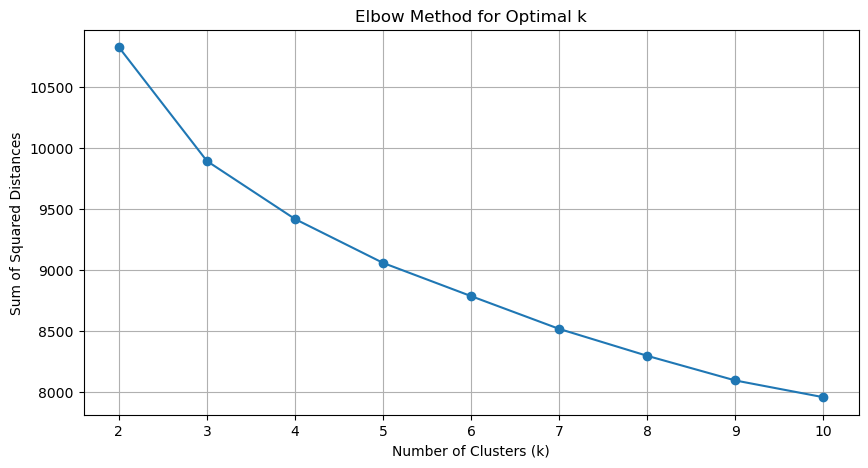

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.xticks(k_values)
plt.grid(True)
plt.show()

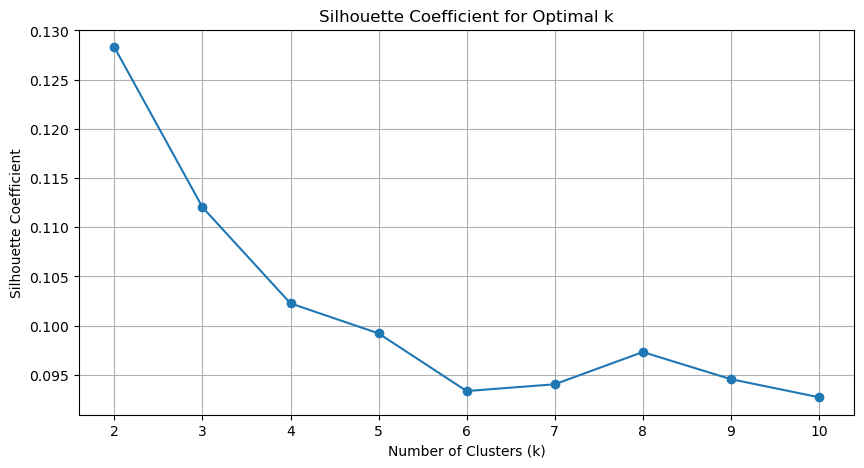

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [46]:
# Perform k-means clustering with the selected k
optimal_k = 4  # Selected based on the Elbow or Silhouette Coefficient method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(transformed_data)
cluster_labels = kmeans.labels_

TypeError: PCA does not support sparse input. We will use TruncatedSVD for a possible alternative. We will use TruncatedSVD for dimensionality reduction instead of PCA(got error while running, so using this).

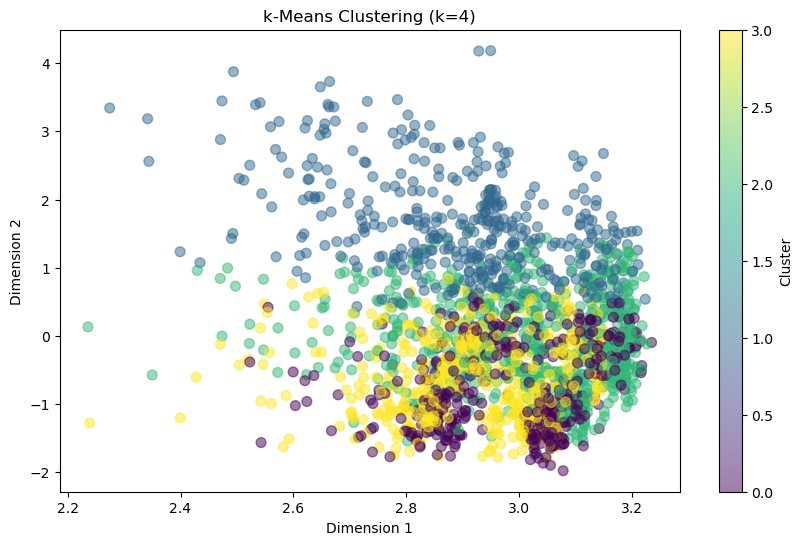

In [50]:
# Visualize the clustering results
# Here, we use TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=2, random_state=42)
transformed_data_2d = svd.fit_transform(transformed_data)

plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('k-Means Clustering (k={})'.format(optimal_k))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

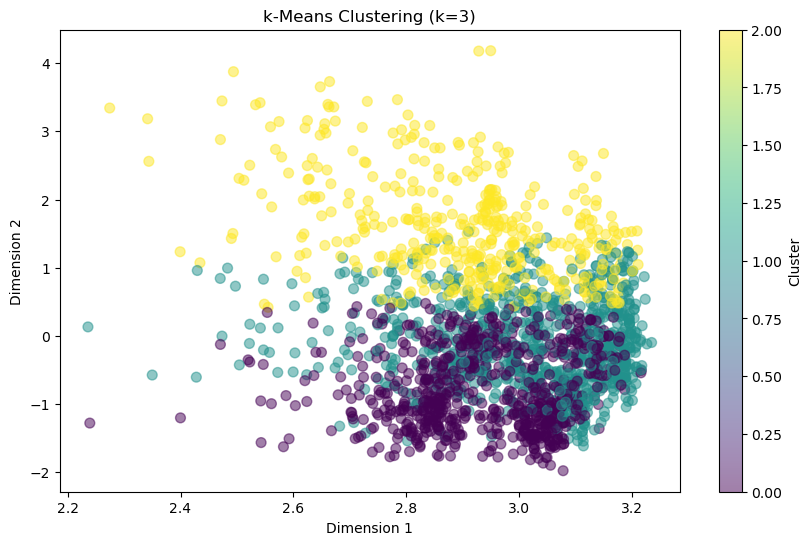

In [53]:
# Perform k-means clustering with the selected k
optimal_k = 3  # Selected based on the Elbow or Silhouette Coefficient method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(transformed_data)
cluster_labels = kmeans.labels_
# Visualize the clustering results
# Here, we use TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=2, random_state=42)
transformed_data_2d = svd.fit_transform(transformed_data)

plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('k-Means Clustering (k={})'.format(optimal_k))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

Silhouette score for k=2: 0.12830018996005776
Silhouette score for k=3: 0.11203737264420727
Silhouette score for k=4: 0.10226589519929666
Silhouette score for k=5: 0.09921252025119165
Silhouette score for k=6: 0.09335400182310477
Silhouette score for k=7: 0.09404158746574083
Silhouette score for k=8: 0.09731804907282347
Silhouette score for k=9: 0.09457866670063324
Silhouette score for k=10: 0.09272622821705825


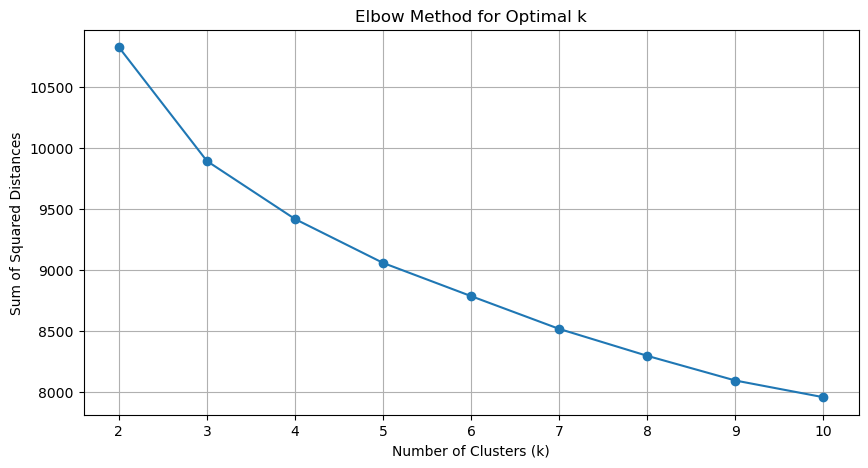

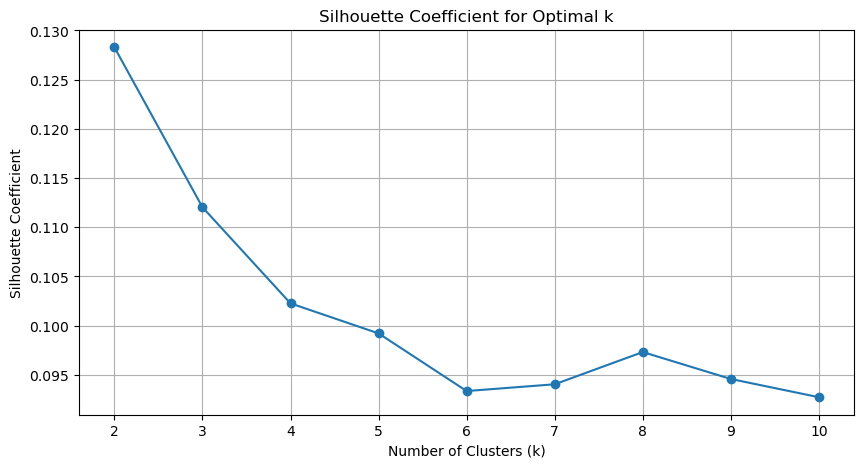

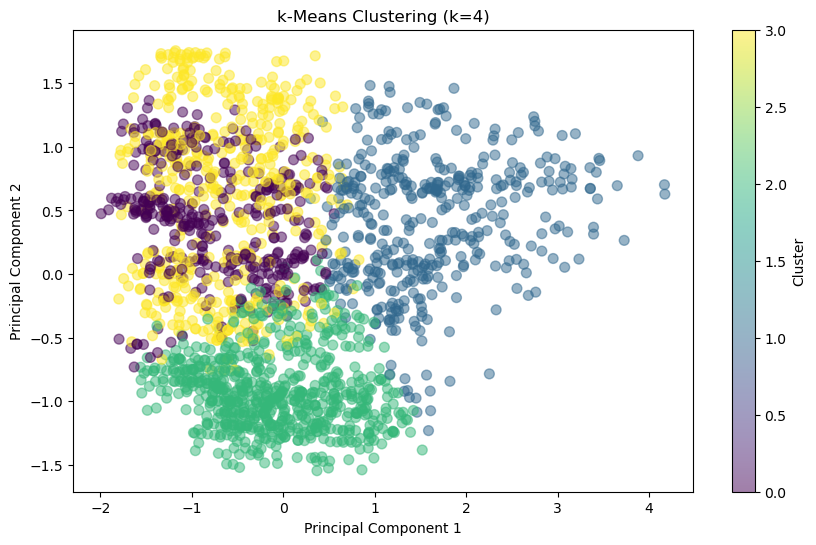

In [54]:
# Convert sparse matrix to dense array
transformed_data_dense = transformed_data.toarray()

# Calculate the sum of squared distances for different values of k
inertia_values = []
silhouette_scores = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    # Fit k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_data_dense)
    
    # Calculate inertia (sum of squared distances)
    inertia_values.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(transformed_data_dense, kmeans.labels_))
    
    # Print the Silhouette score for each k
    print("Silhouette score for k={}: {}".format(k, silhouette_scores[-1]))

# Use the Elbow method to select the optimal k
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Use the Silhouette Coefficient method to further validate the optimal k
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Perform k-means clustering with the selected k
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(transformed_data_dense)
cluster_labels = kmeans.labels_

# Visualize the clustering results
# Here, we use PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
transformed_data_2d = pca.fit_transform(transformed_data_dense)

plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('k-Means Clustering (k={})'.format(optimal_k))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

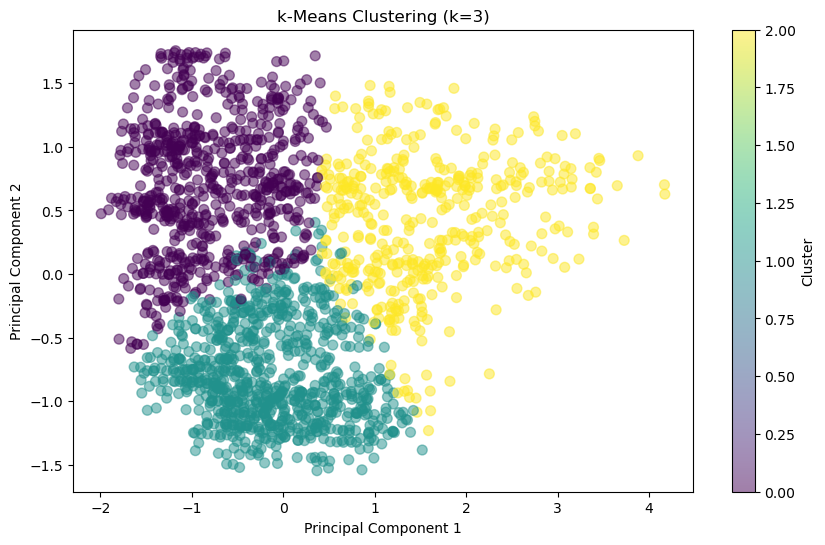

In [59]:
# Perform k-means clustering with the selected k
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(transformed_data_dense)
cluster_labels = kmeans.labels_

# Visualize the clustering results
# Here, we use PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
transformed_data_2d = pca.fit_transform(transformed_data_dense)

plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('k-Means Clustering (k={})'.format(optimal_k))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

After so many tries, this seems very reasonable.

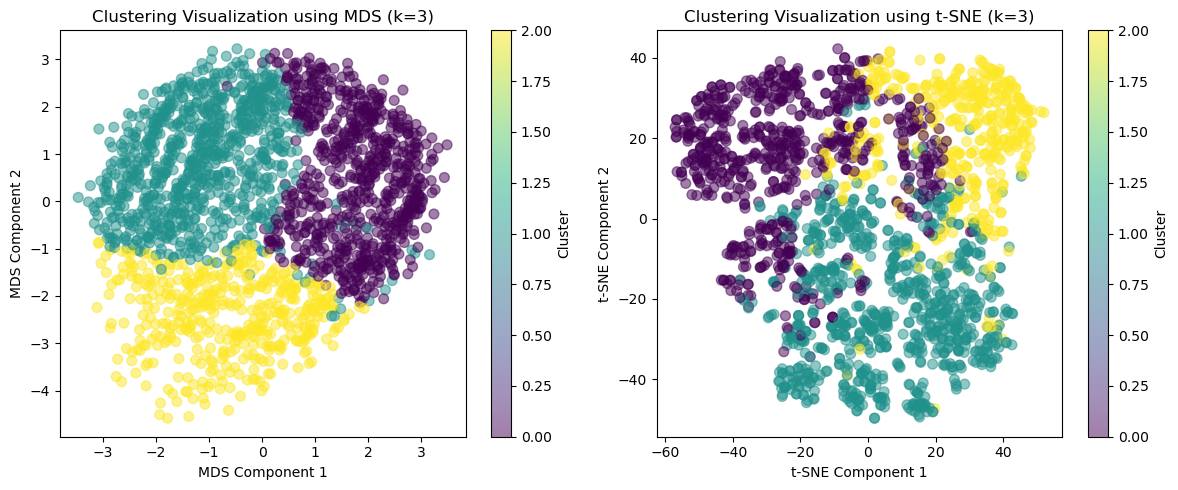

In [65]:
# Apply preprocessing pipeline
transformed_data = preprocessor.fit_transform(df)

# Convert sparse matrix to dense array
transformed_data_dense = np.asarray(transformed_data.todense())

# Perform k-means clustering with the selected k
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(transformed_data_dense)
cluster_labels = kmeans.labels_

# Reduce dimensionality for visualization using MDS
mds = MDS(n_components=2, random_state=42)
transformed_data_mds = mds.fit_transform(transformed_data_dense)

# Reduce dimensionality for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
transformed_data_tsne = tsne.fit_transform(transformed_data_dense)

# Visualize clustering results using MDS
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(transformed_data_mds[:, 0], transformed_data_mds[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Visualization using MDS (k={})'.format(optimal_k))
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='Cluster')

# Visualize clustering results using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(transformed_data_tsne[:, 0], transformed_data_tsne[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Visualization using t-SNE (k={})'.format(optimal_k))
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

- MDS and t-SNE are both dimensionality reduction techniques commonly used for visualizing high-dimensional data in lower-dimensional space, this helps to explore and understand the structure of the data.

- MDS aims to find a low-dimensional representation of the data while preserving the pairwise distances between data points as much as possible. It tries to maintain the relative distances between points in the original high-dimensional space when mapping them to a lower-dimensional space. MDS provides a global perspective, revealing broad patterns and relationships between clusters. It suggests that the clusters are somewhat distinct from each other, with observable separations between them. This implies that the clustering algorithm has successfully partitioned the data into meaningful groups based on the features considered.

- t-SNE is a non-linear dimensionality reduction technique that focuses on preserving the local structure of the data.It models the high-dimensional data in a lower-dimensional space with a t-distribution and used for visualizing and interpreting the fine-grained details and local structures in the data.t-SNE indicates that some clusters exhibit dense and well-separated regions, suggesting homogeneity within those groups. However, it also reveals overlaps and intermingling between certain clusters, indicating potential similarities or mixed characteristics among them.

- Overall, the clustering results suggest that the bank marketing dataset contains distinct segments of customers with varying behaviors and preferences. Further analysis and interpretation are necessary to understand the specific traits and attributes defining each cluster and to devise targeted strategies for marketing and customer engagement.

## Task 3: DBSCAN

In [69]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN
# Define the range of values for epsilon and min_samples
param_grid = {'eps': [0.1, 0.5, 1.0, 1.5, 2.0],
              'min_samples': [3, 5, 10, 20, 50]}

# Generate all possible combinations of parameters
grid = ParameterGrid(param_grid)

# Perform grid search
best_score = -1
best_params = None

for params in grid:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    cluster_labels = dbscan.fit_predict(transformed_data_dense)
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise points
    if n_clusters > 1:  # Ensure more than one cluster
        silhouette_avg = silhouette_score(transformed_data_dense, cluster_labels)
    
        # Update best parameters if silhouette score is higher
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = params

print("Best parameters:", best_params)
print("Silhouette Score:", best_score)

Best parameters: {'eps': 2.0, 'min_samples': 20}
Silhouette Score: 0.015245799343809227


In [ ]:
We will use above values

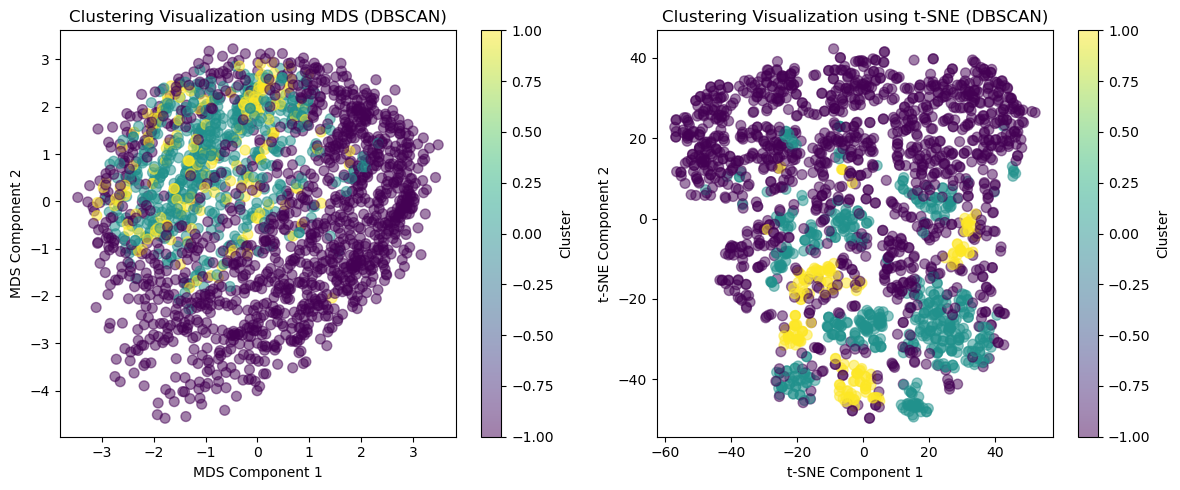

In [70]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2.0, min_samples=20)
cluster_labels = dbscan.fit_predict(transformed_data_dense)

# Reduce dimensionality for visualization using MDS
mds = MDS(n_components=2, random_state=42)
transformed_data_mds = mds.fit_transform(transformed_data_dense)

# Reduce dimensionality for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
transformed_data_tsne = tsne.fit_transform(transformed_data_dense)

# Visualize clustering results using MDS
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(transformed_data_mds[:, 0], transformed_data_mds[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Visualization using MDS (DBSCAN)')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='Cluster')

# Visualize clustering results using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(transformed_data_tsne[:, 0], transformed_data_tsne[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Visualization using t-SNE (DBSCAN)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

DBSCAN can handle nested cluster. While 3d can plotted but from 4d onwards becomes difficult. DBSCAN can be used to identify based on the density of the points to identify the clusters. Outliers are in low density region. DBSAN have core points and non core points. First we randomly pick a core point and assign to first cluster. All the core points close to the first cluster are added to first cluster. Non core points can only join cluster but core points help to grow the size of the cluster. We repeat this for next cluster.

Unlike k-means, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) does not require specifying the number of clusters as an input parameter. Instead, it uses two main parameters:

- Epsilon (eps): This parameter defines the maximum distance between two samples for them to be considered as in the same neighborhood. Points within this distance are considered neighbors.

- Minimum Samples (min_samples): This parameter determines the minimum number of samples required for a point to be considered a core point. A core point must have at least min_samples points (including itself) in its neighborhood to form a dense region.

Based on these parameters, DBSCAN identifies core points, border points, and noise points in the dataset, without requiring a predefined number of clusters. It groups together closely packed core points and assigns border points to the nearest core point's cluster. Points that are not core points or border points are labeled as noise.

DBSCAN has been slightly difficult to understand. I didn't fully understand what to fully make out of above clusters as I couldn't see seperate clusters.